In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
Mix_density = np.array([1.000017,0.999951,0.999828,0.999649,0.999418,0.999137,0.998809,0.998438,0.998023,0.997567,0.997070,0.996537,0.995967,0.995361,0.994722,0.994049,0.993344,0.992609,0.991843,0.991048,0.990224,0.989372,0.988494])
Temperature = np.array([4.996,7.003,9.003,11.004,13.004,15.004,17.004,19.004,21.003,23.003,25.004,27.004,29.004,31.004,33.004,35.004,37.004,39.004,41.003,43.004,45.004,47.005,49.004])

a_CIPM = np.array([-3.983035, 301.797, 522528.9, 69.34881, 999.974950/1000])
a_SB = np.array([9.9983952*10**2,1.6952577*10,-7.9905127*10**(-3),-4.6241757*10**(-5),1.584601*10**(-7),-2.8103006*10**(-10)])/1000
b = 1.6887236*10**(-2)

water_density_SB = 0
for i in range(0, 5):
    water_density_SB += a_SB[i]*Temperature**i/(1+b*Temperature)


water_density_CIPM = a_CIPM[-1]*(1-(((Temperature+a_CIPM[0])**2)*(Temperature+a_CIPM[1]))/(a_CIPM[2]*(Temperature+a_CIPM[3])))

wL = 0.003/(1.003)
Spec_vol_sample = 1/Mix_density

Spec_vol_water_SB = 1/water_density_SB
Spec_vol_water_CIPM = 1/water_density_CIPM

Spec_vol_DPPC_SB = (Spec_vol_sample - (1 - wL) * Spec_vol_water_SB)/wL
Spec_vol_DPPC_CIPM = (Spec_vol_sample - (1 - wL) * Spec_vol_water_CIPM)/wL

In [17]:
# Let us compute dV/dT using forward finite differences to compute alpha

alpha_SB = np.empty(len(Temperature))
alpha_CIPM = np.empty(len(alpha_SB))
for i in range(0,len(alpha_SB)-1):
    alpha_SB[i] = ((Spec_vol_DPPC_SB[i+1]-Spec_vol_DPPC_SB[i])/(Temperature[i+1]-Temperature[i]))/Spec_vol_DPPC_SB[i]
    alpha_CIPM[i] = ((Spec_vol_DPPC_CIPM[i+1]-Spec_vol_DPPC_CIPM[i])/(Temperature[i+1]-Temperature[i]))/Spec_vol_DPPC_CIPM[i]

In [19]:
alpha_SB

array([0.00062333, 0.00046043, 0.00065049, 0.00069852, 0.00085441,
       0.00092089, 0.00069398, 0.00102667, 0.00110682, 0.00147816,
       0.00136931, 0.00165034, 0.00200624, 0.00208638, 0.00254828,
       0.00287596, 0.00306034, 0.00365313, 0.00388915, 0.00447564,
       0.00491127, 0.00537258, 0.        ])

In [20]:
alpha_CIPM

array([0.00062596, 0.00044852, 0.00060715, 0.00060821, 0.00070126,
       0.00068843, 0.00036429, 0.00057998, 0.00052183, 0.00073205,
       0.00043571, 0.0005029 , 0.00061688, 0.00042219, 0.00058066,
       0.00057062, 0.00037931, 0.00056983, 0.00035855, 0.00047218,
       0.00039425, 0.00030672, 0.        ])

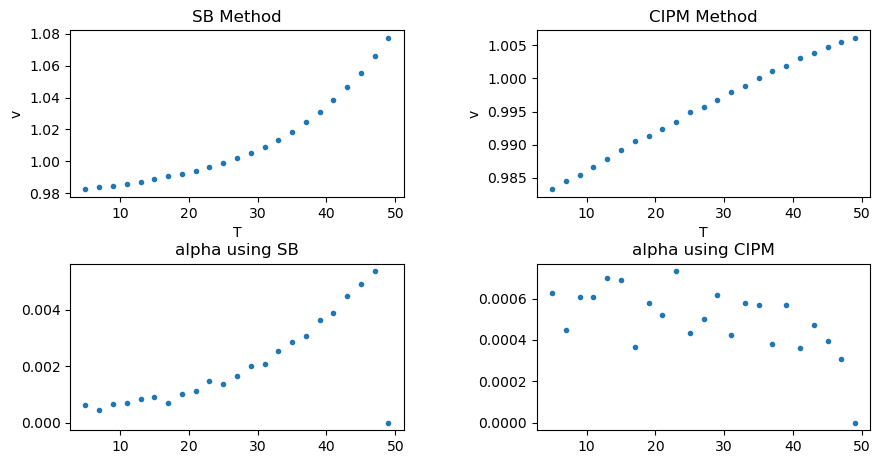

In [18]:
fig, ax = plt.subplots(2,2,figsize=(10, 5))

ax[0,0].plot(Temperature, Spec_vol_DPPC_SB,'.')
ax[0,1].plot(Temperature,Spec_vol_DPPC_CIPM,'.')
ax[1,0].plot(Temperature,alpha_SB,'.')
ax[1,1].plot(Temperature,alpha_CIPM,'.')

ax[0,0].set_xlabel('T')
ax[0,1].set_xlabel('T')
ax[0,0].set_ylabel('v')
ax[0,1].set_ylabel('v')
ax[0,0].set_title('SB Method')
ax[0,1].set_title('CIPM Method')
ax[1,0].set_title('alpha using SB')
ax[1,1].set_title('alpha using CIPM')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In [22]:
np.polyfit(Temperature,np.log(Spec_vol_DPPC_SB),1)

array([ 0.00192577, -0.04065897])

In [23]:
np.polyfit(Temperature,np.log(Spec_vol_DPPC_CIPM),1)

array([ 0.00053313, -0.01901413])

In [21]:
M = 786
Na = 6.02214076*10**(23)

vm = Spec_vol_DPPC_SB*M/Na*10**(24)
vm = np.mean(vm)
vm

1320.5592907470639